# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing and Processing Data


In [2]:
my_data = pd.read_csv('airline_passenger_satisfaction.csv')

In [3]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [4]:
rating_columns = [
    'Departure and Arrival Time Convenience',
    'Ease of Online Booking',
    'Check-in Service',
    'Online Boarding',
    'Gate Location',
    'On-board Service',
    'Seat Comfort',
    'Leg Room Service',
    'Cleanliness',
    'Food and Drink',
    'In-flight Service',
    'In-flight Wifi Service',
    'In-flight Entertainment',
    'Baggage Handling'
]

# 1. Columns with ratings
rating_data_only = my_data[rating_columns]

# 2. Changed all the 0 to NaN to calculate the average per row. Based on the data_dictionary.csv 0 means there was no rating (not applicable).
rating_data_no_zeros = rating_data_only.replace(0, np.nan)

# 3. Average count for each row (axis=1 – by row)
my_data['Average Excluding Zeros'] = round(rating_data_no_zeros.mean(axis=1), 2)

In [5]:
my_data.loc[:,'Departure and Arrival Time Convenience':'Average Excluding Zeros'].reset_index().head(50)

,index,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average Excluding Zeros
0,0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,3.86
1,1,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied,3.79
2,2,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied,3.93
3,3,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied,3.79
4,4,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied,3.50
5,5,4,4,3,5,4,4,4,4,3,3,4,4,4,4,Satisfied,3.86
6,6,3,3,4,4,3,5,5,5,4,5,5,3,5,5,Satisfied,4.21
7,7,3,4,3,4,4,3,4,4,4,4,3,4,3,3,Satisfied,3.57
8,8,1,1,3,2,1,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied,2.93
9,9,2,5,3,5,2,5,4,5,4,2,5,2,5,5,Satisfied,3.86


In [6]:
my_data['count'] = 1

In [7]:
# Miles to kilometers:
my_data['Flight Distance (km)'] = round(my_data['Flight Distance'] * 1.609344, 2)

In [8]:
# Created flight distance groups
def atstumas(eilute):
    if eilute['Flight Distance (km)'] < 500:
        return "Very Short Flight"
    elif eilute['Flight Distance (km)'] <= 1500:
        return "Short Flight"
    elif eilute['Flight Distance (km)'] <= 4000:
        return "Medium-Haul Flight"
    elif eilute['Flight Distance (km)'] > 4000:
        return "Long-Haul Flight"
    else:
        return "N/A"

my_data["Distance Category"] = my_data.apply(atstumas, axis='columns')
my_data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average Excluding Zeros,count,Flight Distance (km),Distance Category
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,5,3,5,5,Neutral or Dissatisfied,3.86,1,1321.27,Short Flight
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,3,5,2,5,5,Satisfied,3.79,1,1321.27,Short Flight
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,4,3,3,Satisfied,3.93,1,1372.77,Short Flight
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,4,5,2,5,5,Satisfied,3.79,1,3065.80,Medium-Haul Flight
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,3,3,3,3,Satisfied,3.50,1,5584.42,Long-Haul Flight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,4,5,4,4,4,Neutral or Dissatisfied,3.79,1,719.38,Short Flight
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,2,4,3,2,5,Neutral or Dissatisfied,3.57,1,495.68,Very Short Flight
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,4,2,3,5,Neutral or Dissatisfied,3.14,1,542.35,Short Flight
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,3,4,5,3,5,Satisfied,3.71,1,542.35,Short Flight


In [9]:
# Created age groups
def amzius(eilute):
    if eilute['Age'] <= 12:
        return "Children"
    elif eilute['Age'] <= 19:
        return "Teenagers"
    elif eilute['Age'] <= 39:
        return "Younger adults"
    elif eilute['Age'] <= 64:
        return "Adults"
    elif eilute['Age'] > 64:
        return "Seniors"
    else:
        return "N/A"

my_data["Age Group"] = my_data.apply(amzius, axis='columns')
my_data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average Excluding Zeros,count,Flight Distance (km),Distance Category,Age Group
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,3,5,5,Neutral or Dissatisfied,3.86,1,1321.27,Short Flight,Adults
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,2,5,5,Satisfied,3.79,1,1321.27,Short Flight,Younger adults
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,4,3,3,Satisfied,3.93,1,1372.77,Short Flight,Adults
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,2,5,5,Satisfied,3.79,1,3065.80,Medium-Haul Flight,Adults
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,3,3,3,Satisfied,3.50,1,5584.42,Long-Haul Flight,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,4,4,4,Neutral or Dissatisfied,3.79,1,719.38,Short Flight,Younger adults
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,4,3,2,5,Neutral or Dissatisfied,3.57,1,495.68,Very Short Flight,Adults
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,4,2,3,5,Neutral or Dissatisfied,3.14,1,542.35,Short Flight,Adults
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,5,3,5,Satisfied,3.71,1,542.35,Short Flight,Adults


# **1. Male and Female Rating Comparison**


### How many ratings from Male and Female passengers?


In [10]:
gender_evaluation = my_data.groupby('Gender')['count'].count().reset_index()

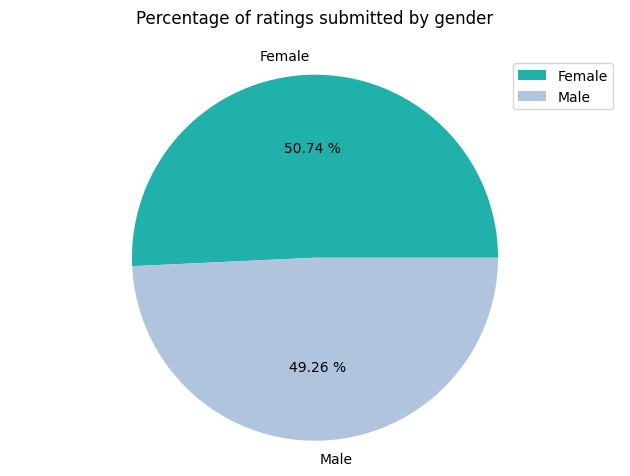

In [11]:
skiltys, text, _ = plt.pie(gender_evaluation['count'], labels=gender_evaluation['Gender'], autopct='%.2f %%', colors = ["lightseagreen","lightsteelblue"])

plt.title('Percentage of ratings submitted by gender', pad=24)

plt.legend(skiltys, gender_evaluation['Gender'], loc='best')
plt.tight_layout()
plt.axis('equal')

plt.show()

### Comparison of Male and Female average rating.

In [12]:
gender_average_eval = my_data.groupby('Gender')['Average Excluding Zeros'].mean().round(2).reset_index()
gender_average_eval

,Gender,Average Excluding Zeros
0,Female,3.27
1,Male,3.28


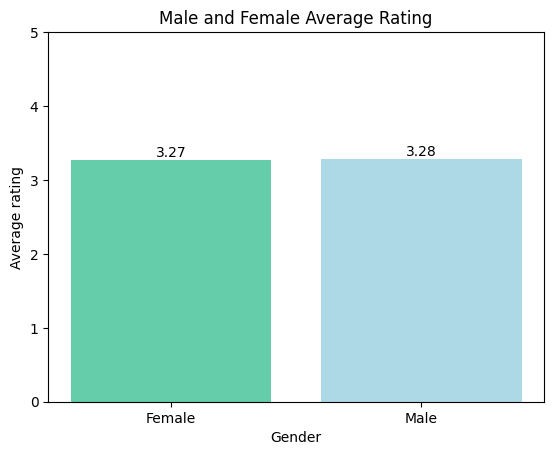

In [13]:
fig, ax = plt.subplots()
bar_container = ax.bar(gender_average_eval['Gender'], gender_average_eval['Average Excluding Zeros'], color=['mediumaquamarine','lightblue'])

ax.set(xlabel='Gender', ylabel='Average rating', title='Male and Female Average Rating', ylim=(0, 5))
ax.bar_label(bar_container, fmt='{:,.2f}')
plt.xticks(gender_average_eval['Gender'])

plt.show()

# **2. Flight Class and Rating**


### Do Business Class passengers give better ratings?

In [14]:
travel_class = my_data.groupby('Class')['Average Excluding Zeros'].mean().round(2).reset_index()
travel_class

,Class,Average Excluding Zeros
0,Business,3.47
1,Economy,3.10
2,Economy Plus,3.09


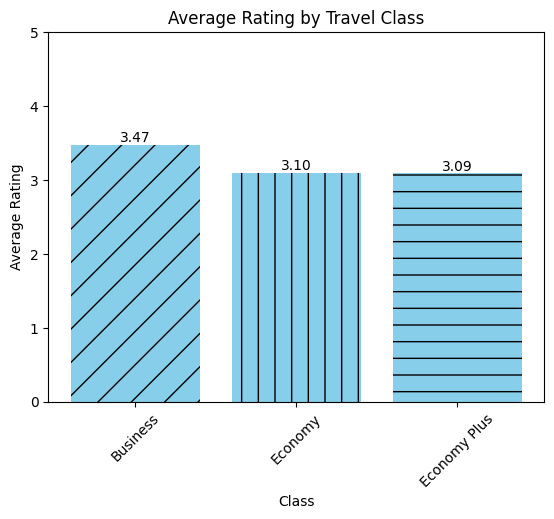

In [15]:
fig, ax = plt.subplots()
bar_container = ax.bar(travel_class['Class'], travel_class['Average Excluding Zeros'], color="skyblue")

ax.set(xlabel='Class', ylabel='Average Rating', title='Average Rating by Travel Class', ylim=(0, 5))
ax.bar_label(bar_container, fmt='{:,.2f}')

bar_container[0].set_hatch('/')
bar_container[1].set_hatch('|')
bar_container[2].set_hatch('-')

plt.xticks(travel_class['Class'], rotation=45)

plt.show()

### To improve business class, it is useful to find out the TOP 10 worst ratings and find in which categories the rating was poor.

In [16]:
my_data.loc[my_data['Class'] == "Business"
  ].sort_values(by='Average Excluding Zeros', ascending=True).head(10).reset_index()

,index,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average Excluding Zeros,count,Flight Distance (km),Distance Category,Age Group
0,13936,13937,Female,53,Returning,Business,Business,3492,3,7.0,...,1,1,1,1,Neutral or Dissatisfied,1.14,1,5619.83,Long-Haul Flight,Adults
1,105227,105228,Female,57,Returning,Business,Business,1914,31,26.0,...,1,1,1,1,Neutral or Dissatisfied,1.14,1,3080.28,Medium-Haul Flight,Adults
2,129045,129046,Male,44,Returning,Business,Business,1744,0,0.0,...,1,1,1,1,Neutral or Dissatisfied,1.21,1,2806.70,Medium-Haul Flight,Adults
3,51710,51711,Male,77,Returning,Business,Business,2039,0,0.0,...,1,1,1,1,Neutral or Dissatisfied,1.21,1,3281.45,Medium-Haul Flight,Seniors
4,128418,128419,Male,32,Returning,Business,Business,338,1,4.0,...,2,1,1,2,Neutral or Dissatisfied,1.21,1,543.96,Short Flight,Younger adults
5,108707,108708,Female,45,Returning,Business,Business,425,28,22.0,...,1,1,1,1,Neutral or Dissatisfied,1.21,1,683.97,Short Flight,Adults
6,18578,18579,Male,42,Returning,Business,Business,3311,0,7.0,...,1,1,1,1,Neutral or Dissatisfied,1.21,1,5328.54,Long-Haul Flight,Adults
7,19668,19669,Male,67,Returning,Business,Business,2659,0,0.0,...,1,1,1,1,Neutral or Dissatisfied,1.29,1,4279.25,Long-Haul Flight,Seniors
8,41832,41833,Male,59,Returning,Business,Business,462,0,1.0,...,1,1,1,1,Satisfied,1.29,1,743.52,Short Flight,Adults
9,10085,10086,Female,43,Returning,Business,Business,266,0,0.0,...,1,1,1,1,Neutral or Dissatisfied,1.29,1,428.09,Very Short Flight,Adults


### How much does flight distance affect the rating of business class travelers?

In [17]:
my_data.loc[
    my_data['Class'] == "Business"
].groupby('Distance Category')['Average Excluding Zeros'].mean().round(2).reset_index()

,Distance Category,Average Excluding Zeros
0,Long-Haul Flight,3.49
1,Medium-Haul Flight,3.49
2,Short Flight,3.44
3,Very Short Flight,3.40


# **3. Comparison of New and Returning Passengers**

### Of all those who submitted ratings how many are new and how many returning passengers?

In [18]:
customer_type_group = my_data.groupby('Customer Type')['count'].count().reset_index()

customer_type_group

,Customer Type,count
0,First-time,23780
1,Returning,106100


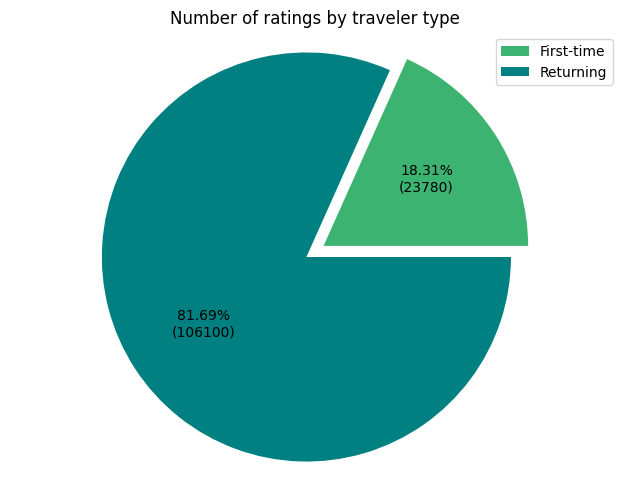

In [33]:
def absolute_value(percents, all_values):
    bendras_sk = int(round(percents / 100. * sum(all_values), 2))
    return f"{percents:.2f}%\n({bendras_sk:d})"

skiltys, texts, _ = plt.pie(customer_type_group['count'], explode=[0, 0.1], autopct=lambda proc: absolute_value(proc, customer_type_group['count']), colors = ["mediumseagreen","teal"])

plt.legend(skiltys, customer_type_group['Customer Type'], loc='best')
plt.tight_layout()
plt.axis('equal')

plt.title('Number of ratings by traveler type')

plt.show()

### Do new travelers tend to give better ratings if the flight is very short or short?

In [20]:
new_customer_grouped = my_data.loc[
    (my_data['Customer Type'] == 'First-time') & ((my_data['Distance Category'].str[:5] == "Short") | (my_data['Distance Category'] == "Very Short Flight"))
].groupby('Distance Category')['Average Excluding Zeros'].mean().round(2).reset_index()

In [21]:
new_customer_grouped

,Distance Category,Average Excluding Zeros
0,Short Flight,3.12
1,Very Short Flight,3.10


In [22]:
total_average_rating = my_data['Average Excluding Zeros'].mean().round(2)
total_average_rating

np.float64(3.28)

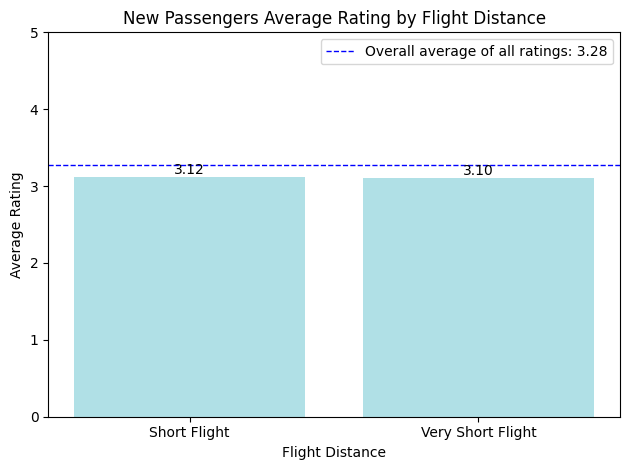

In [34]:
fig, ax = plt.subplots()
bar_container = ax.bar(new_customer_grouped['Distance Category'], new_customer_grouped['Average Excluding Zeros'], color="powderblue")

ax.set(xlabel='Flight Distance', ylabel='Average Rating', title='New Passengers Average Rating by Flight Distance', ylim=(0, 5))
ax.bar_label(bar_container, fmt='{:,.2f}')
plt.xticks(new_customer_grouped['Distance Category'])

ax.axhline(y=total_average_rating, color='blue', linestyle='--', linewidth=1, label=f'Overall average of all ratings: {total_average_rating:.2f}')
ax.legend()
plt.tight_layout()

plt.show()

### Are the results different from the ratings of returning travelers?

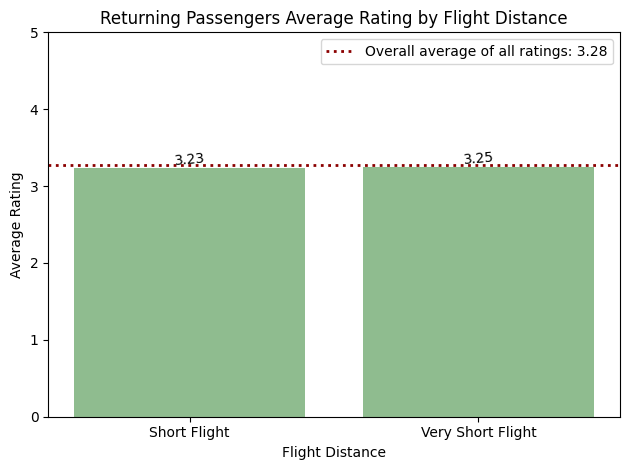

In [35]:
returning_customer_grouped = my_data.loc[
    (my_data['Customer Type'] == 'Returning') & ((my_data['Distance Category'].str[:5] == "Short") | (my_data['Distance Category'] == "Very Short Flight"))
].groupby('Distance Category')['Average Excluding Zeros'].mean().round(2).reset_index()

fig, ax = plt.subplots()
bar_container = ax.bar(returning_customer_grouped['Distance Category'], returning_customer_grouped['Average Excluding Zeros'], color="darkseagreen")

ax.set(xlabel='Flight Distance', ylabel='Average Rating', title='Returning Passengers Average Rating by Flight Distance', ylim=(0, 5))
ax.bar_label(bar_container, fmt='{:,.2f}',rotation=5)
plt.xticks(returning_customer_grouped['Distance Category'])

ax.axhline(y=total_average_rating, color='darkred', linestyle='dotted', linewidth=2, label=f'Overall average of all ratings: {total_average_rating:.2f}')
ax.legend()
plt.tight_layout()

plt.show()

# **4. The impact of departure and arrival delays on the ratings**

### Longest departure and arrival delays

In [25]:
top10_late = my_data.sort_values(by=['Departure Delay','Arrival Delay'], ascending=False).head(10).reset_index()
top10_late

,index,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Average Excluding Zeros,count,Flight Distance (km),Distance Category,Age Group
0,73470,73471,Female,47,Returning,Personal,Economy,1120,1592,1584.0,...,3,2,2,4,Neutral or Dissatisfied,2.71,1,1802.47,Medium-Haul Flight,Adults
1,69660,69661,Male,32,Returning,Business,Business,2916,1305,1280.0,...,3,2,3,4,Satisfied,3.71,1,4692.85,Long-Haul Flight,Younger adults
2,73481,73482,Male,8,Returning,Personal,Economy,1144,1128,1115.0,...,3,2,4,5,Neutral or Dissatisfied,2.57,1,1841.09,Medium-Haul Flight,Children
3,4902,4903,Male,49,Returning,Business,Business,1959,1017,1011.0,...,4,1,4,5,Satisfied,3.21,1,3152.70,Medium-Haul Flight,Adults
4,78299,78300,Male,30,Returning,Personal,Economy,1598,978,970.0,...,4,1,5,4,Neutral or Dissatisfied,2.36,1,2571.73,Medium-Haul Flight,Younger adults
5,63688,63689,Female,39,Returning,Business,Business,1696,951,940.0,...,1,1,2,3,Neutral or Dissatisfied,2.00,1,2729.45,Medium-Haul Flight,Younger adults
6,8344,8345,Male,47,Returning,Business,Business,2187,933,920.0,...,4,4,5,5,Satisfied,4.29,1,3519.64,Medium-Haul Flight,Adults
7,4375,4376,Female,53,Returning,Business,Business,2418,930,952.0,...,4,3,3,2,Neutral or Dissatisfied,3.29,1,3891.39,Medium-Haul Flight,Adults
8,83675,83676,Male,43,First-time,Business,Business,577,921,924.0,...,3,3,5,5,Neutral or Dissatisfied,4.00,1,928.59,Short Flight,Adults
9,69503,69504,Male,27,Returning,Business,Business,1746,859,860.0,...,4,1,4,4,Satisfied,3.64,1,2809.91,Medium-Haul Flight,Younger adults


### How does the average rating of these passengers compare to the overall average?

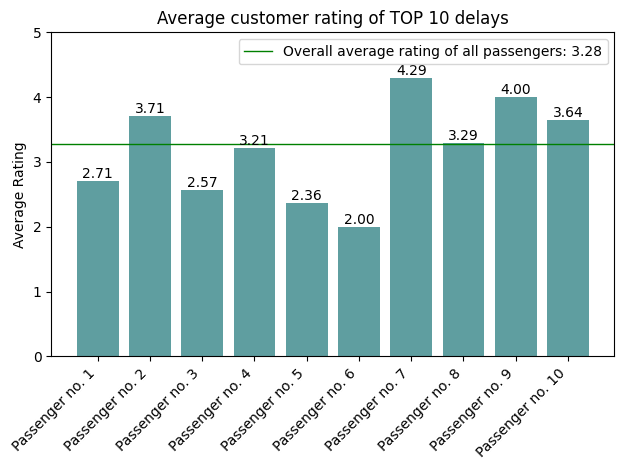

In [26]:
top10_late['title'] = "Passenger no. " + (top10_late.index + 1).astype(str)

fig, ax = plt.subplots()
bar_container = ax.bar(top10_late['title'], top10_late['Average Excluding Zeros'], color="cadetblue")

ax.set(ylabel='Average Rating', title='Average customer rating of TOP 10 delays', ylim=(0, 5))
ax.bar_label(bar_container, fmt='{:,.2f}')
plt.xticks(top10_late['title'], rotation=45, ha='right')

ax.axhline(y=total_average_rating, color='green', linestyle='solid', linewidth=1, label=f'Overall average rating of all passengers: {total_average_rating:.2f}')
ax.legend()
plt.tight_layout()

plt.show()

# **5. Ratings and Age Groups**

### Distribution of ratings by age group

In [27]:
age_evaluation = my_data.groupby('Age Group')['count'].count().sort_values(ascending=True).reset_index()

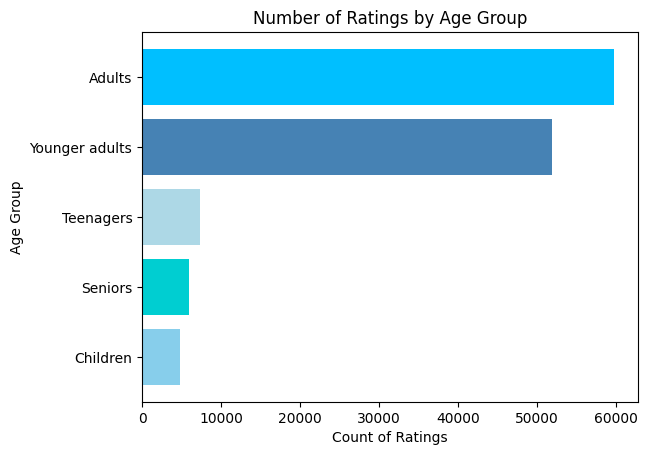

In [36]:
plt.barh(age_evaluation['Age Group'], age_evaluation['count'], color=['skyblue', 'darkturquoise', 'lightblue', 'steelblue', 'deepskyblue'], height=0.8)

plt.title('Number of Ratings by Age Group')
plt.ylabel('Age Group')
plt.xlabel('Count of Ratings')

plt.yticks(age_evaluation['Age Group'])
plt.show()

### Distribution of ratings by age category and overall satisfaction.

In [29]:
age_and_satisfaction = my_data.groupby(['Age Group', 'Satisfaction'])['count'].count().sort_values(ascending=False).reset_index()

In [30]:
age_and_satisfaction

,Age Group,Satisfaction,count
0,Adults,Satisfied,33128
1,Younger adults,Neutral or Dissatisfied,31924
2,Adults,Neutral or Dissatisfied,26706
3,Younger adults,Satisfied,19959
4,Teenagers,Neutral or Dissatisfied,5792
5,Seniors,Neutral or Dissatisfied,4882
6,Children,Neutral or Dissatisfied,4148
7,Teenagers,Satisfied,1594
8,Seniors,Satisfied,1101
9,Children,Satisfied,646


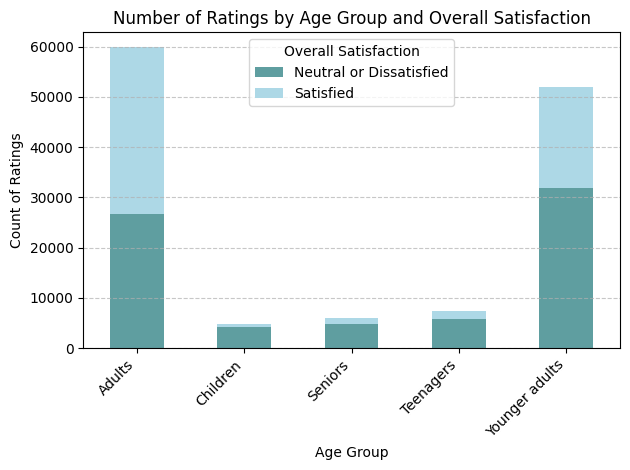

In [37]:
stacked_bar = age_and_satisfaction.pivot_table(index='Age Group', columns='Satisfaction', values='count')

ax = stacked_bar.plot(
    kind='bar',
    stacked=True,
    color=['cadetblue','lightblue'])

plt.title('Number of Ratings by Age Group and Overall Satisfaction')
plt.xlabel('Age Group')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Overall Satisfaction', loc='best')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [32]:
my_data.groupby('Age Group')['Average Excluding Zeros'].mean().round(2).sort_values().reset_index()

,Age Group,Average Excluding Zeros
0,Children,3.10
1,Seniors,3.10
2,Teenagers,3.16
3,Younger adults,3.22
4,Adults,3.37


# Final Remarks

This analysis primarily focused on the average rating – specifically, whether gender, flight class, passenger type, age group, or flight delays had an impact.

No significant differences were found in the average ratings between men and women. Those traveling in business class, especially for longer distances, tended to give better ratings than those traveling in other flight classes. Also, returning customers gave better ratings than new customers who chose short flights.

Regarding age groups, travelers aged 45-64 were the most satisfied. Additionally, flight delays could have contributed to lower ratings.